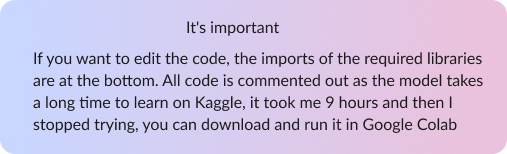

# About PPO model
PPO uses the Actor-Critic approach for the agent. This means that it uses two models, one called the Actor and the other called Critic:

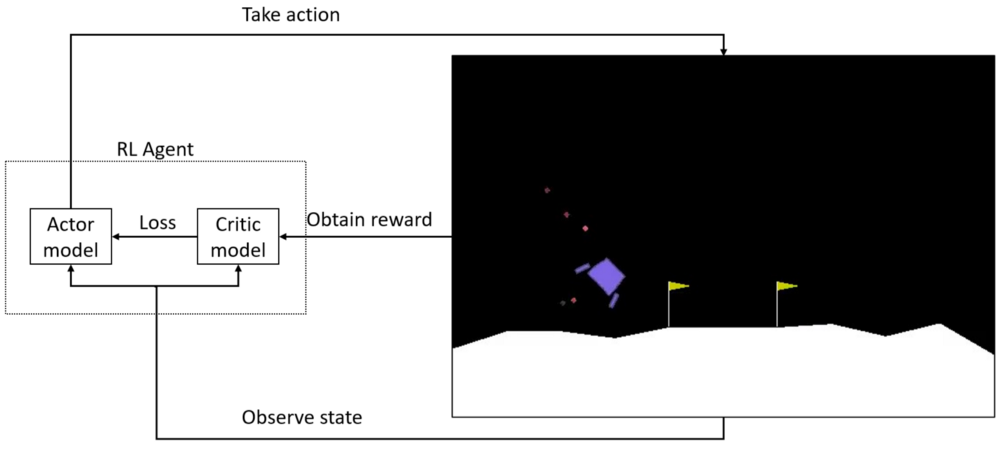

# The Actor model
The Actor model performs the task of learning what action to take under a particular observed state of the environment. In LunarLander-v2 case, it takes eight values list of the game as input which represents the current state of our rocket and gives a particular action what engine to fire as output:
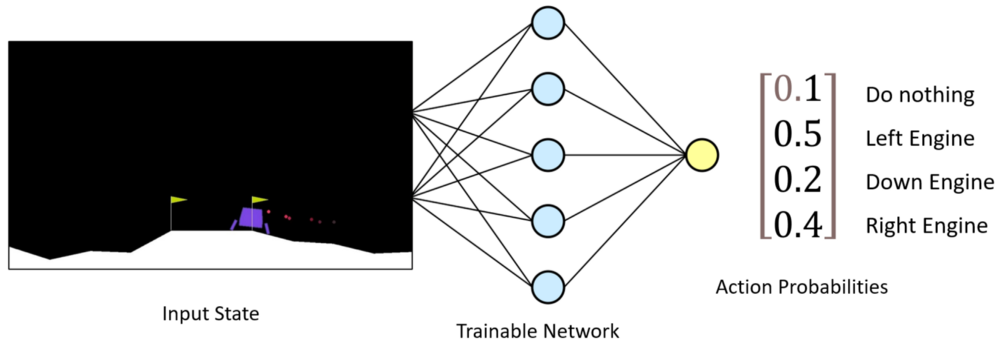

# Reward function details:
  * Moving from the top of the screen to the landing pad and zero speed is about 100~140 points
  * Firing main engine is -0.3 each frame
  * Each leg ground contact is +10 points
  * Episode finishes if the lander crashes (additional - 100 points) or come to rest (+100 points)
  * The game is solved if your agent does 200 points.

# Inspect the observation space

The observation is a vector of size 8, where each value
is a different piece of information about the lander:

  * Horizontal pad coordinate (x)
  * Horizontal pad coordinate (x)
  * Vertical pad coordinate (y)
  * Horizontal speed (x)
  * Vertical speed (y)
  * Angle
  * Angular speed
  * If the left leg has contact point touched the land




In [1]:
# env = gym.make("LunarLander-v2")

# different piece of information about the lander
# print("_____OBSERVATION SPACE_____ \n")
# print("Observation Space Shape", env.observation_space.shape)
# print("Sample observation", env.observation_space.sample()) # Get a random observation

**Output:**

_____OBSERVATION SPACE_____  

Observation Space Shape (8,) 

Sample observation [-0.07946901, 1.2141365, -1.0370778,  1.3322215,  0.56953627, 0.4239776]

# Inspect the action space

The action space is discrete, with four available actions.:
  1. Do nothing. 
  2. Fire left orientation engine
  3. Fire the main engine. 
  4. Fire right orientation engine


In [2]:
# The action space is discrete, with four available actions

# print("\n _____ACTION SPACE_____ \n")
# print("Action Space Shape", env.action_space.n)
# print("Action Space Sample", env.action_space.sample()) # Take a random action

**Output:**

 _____ACTION SPACE_____ 
 
Action Space Shape 4

Action Space Sample 3

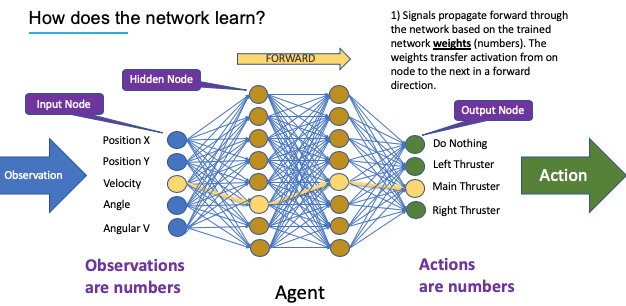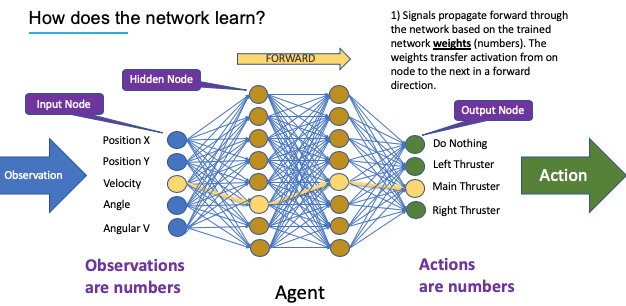

# Structure of PPO Model

PPO (Proximal Policy Optimization) is a combination of:
Value-based reinforcement learning method: learning an action-value function that will tell us what’s the most valuable action to take given a state and action.
Policy-based reinforcement learning method: learning a policy that will gives us a probability distribution over actions.

**PPO model:**

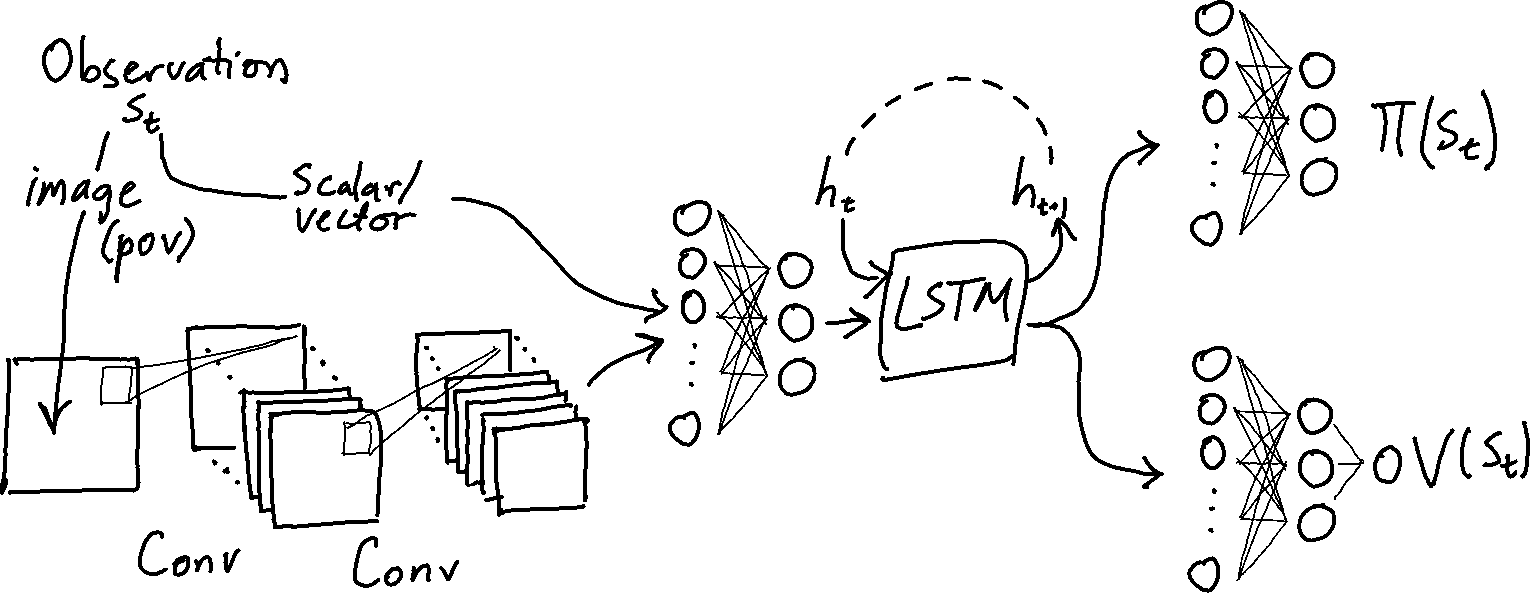

PPO architecture. Observations s't'
 can include both images and scalar/vector quantities. Images are fed through a few convolutional layers. The non-image portions of the input state and the output of the convolutions are concatenated then passed through a shallow MLP (multilayer perceptron ) before getting fed into the LSTM. Separate MLPs compute the policy 
π( s t ) and value V ( s t ) from the output of the LSTM.

# LunarLander-v2 PPO Model

In [3]:
def ppo_model():
  # Create environment Vectorized Environment
  # We can stack multiple independent environments 
  # into a single vector to get more diverse experiences during the training
  env = make_vec_env('LunarLander-v2', n_envs=16)

  # Instantiate the agent
  model = PPO(
      policy="MlpPolicy",
      env=env,
      n_steps=2248,
      batch_size=125,
      n_epochs=9,
      gamma=0.999,
      gae_lambda=0.99,
      ent_coef=0.01,
      verbose=1,
      vf_coef=0.7,
      max_grad_norm=9,
  )

  # Train the agent
  ppo_model = model.learn(total_timesteps=10e5)

  # Save the model
  model_name = "ppo-LunarLander-v2"
  ppo_model.save(model_name)


def check_ppo_model_score():
  model = PPO.load("ppo-LunarLander-v2")
  eval_env = gym.make('LunarLander-v2')
  mean_reward, std_reward = evaluate_policy(model, eval_env, n_eval_episodes=20)
  print(f"mean_reward = {mean_reward:.2f} +/- {std_reward}")
  return model

# ppo_model()
# check_ppo_model_score()

**Output:**

 _____ **rollout**  _____         

    ep_len_mean          | 967         
    ep_rew_mean          | 140         
 _____ **time**  _____

    fps                  | 769         
    iterations           | 28          
    time_elapsed         | 1309        
    total_timesteps      | 1007104     
 _____ **train** _____         

    approx_kl            | 0.004154133 
    clip_fraction        | 0.0228      
    clip_range           | 0.2         
    entropy_loss         | -1.14       
    explained_variance   | 0.983       
    learning_rate        | 0.0003      
    loss                 | 3.44        
    n_updates            | 243         
    policy_gradient_loss | -0.00144    
    value_loss           | 18.7        

# Test PPO Model

In [4]:
def test_model():
    test_env = gym.make("LunarLander-v2")
    model = PPO.load("ppo-LunarLander-v2")

    observation = test_env.reset()
    total_reward = 0
    while True:
      test_env.render()
      action, states = model.predict(observation, deterministic=True)
      observation, reward, done, info = test_env.step(action)
      total_reward += reward
      if done:
        print("Landed Secsessfuly")
        break
    return total_reward

# print(total_reward)
# test_env.close()

**Output:** 

mean_reward = 267.62 +/- 17.8004982708624

In [5]:
# !apt install xvfb
# !pip install box2d
# !apt install ffmpeg
# !sudo apt-get update
# !apt install swig cmake
# !pip install box2d-kengz
# !apt install python-opengl
# !pip install pyglet==1.5.1
# !pip install huggingface_sb3
# !pip3 install pyvirtualdisplay
# !pip install stable-baselines3[extra]

In [6]:
# import io
# import os
# import gym
# import glob
# import torch
# import base64
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib.animation as animation
# from matplotlib import animation, rc
# from IPython.display import Math, HTML

# from pyvirtualdisplay import Display # Virtual display
# Display(visible=0, size=(1400, 900)).start()

# from huggingface_sb3 import load_from_hub, package_to_hub, push_to_hub
# from huggingface_hub import notebook_login # log to Hugging Face account

# from stable_baselines3 import DQN
# from stable_baselines3 import PPO
# from stable_baselines3.common.evaluation import evaluate_policy
# from stable_baselines3.common.env_util import make_vec_env
# from stable_baselines3.common.results_plotter import ts2xy, load_results
# from stable_baselines3.common.callbacks import EvalCallback
# from stable_baselines3.common.env_util import make_atari_env